## Content
- Multivariate Data Visualization
  - CCN
  - CNN
  - NNN
  - CCC
- Subplots
- JointPlot
- Pairplot
- Correlation and Heatmap


#### Importing the data

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2022-12-21 05:03:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.58, 18.164.173.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  --.-KB/s    in 0.05s   

2022-12-21 05:03:49 (40.2 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


If you remember, `Genres`, `Publisher` and `Platform` were categorical values, so we used the top 3 of each in the last lecture

In [ ]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


## Multivariate

Let’s try to add 3rd variable on the top of the plots we have seen so far




#### NNC

#### How can we visualize the correlation between NA and EU, but for different genres?

Here, we have two numerical and one categorical variable!

Numerical-Numerical → Scatterplot, need to add info about one categorical variable
	
Numerical-Categorical → Boxplot, need to add info about one numerical variable

#### Let's ask two questions
- Is it Possible to add information about a continuous variable upon boxplots?
  - Perhaps No
- Is it Possible to add information about a categorical variable on scatterplot?
  - Yes, use colors

Solution: Scatterplot with color

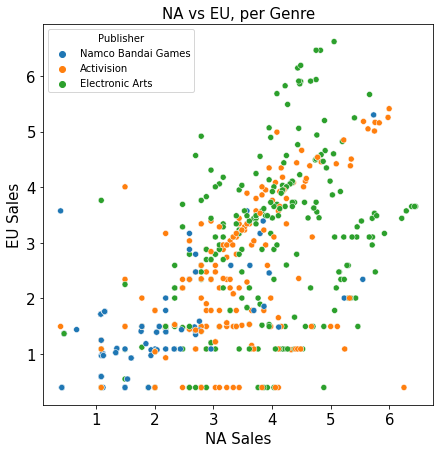

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='NA_Sales', y='EU_Sales',hue='Publisher',data=top3_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('NA Sales',fontsize=15)
plt.ylabel('EU Sales',fontsize=15)
plt.title('NA vs EU, per Genre', fontsize=15)
plt.show()

Inferences:
- If we see this plot, we can notice now that Namco has lower sales correlation, while Activision has a concentrated positivee correlation
- EA also has positive correlation, but it's more spread compared to Activision


### CCN

#### Now, how will you visualize Global Sales for each publisher, but separated by Genres?

We have two categorical and one numerical data here!

- Categorical-Categorical → Stacked Barplot, need to add info about one continuous feature

- Categorical-Numerical → Boxplots, need to add categorical variable

Which one is easier and possible?
We can add one categorical variable by “dodging” multiple boxplots

Solution: Dodged Boxplots 
	

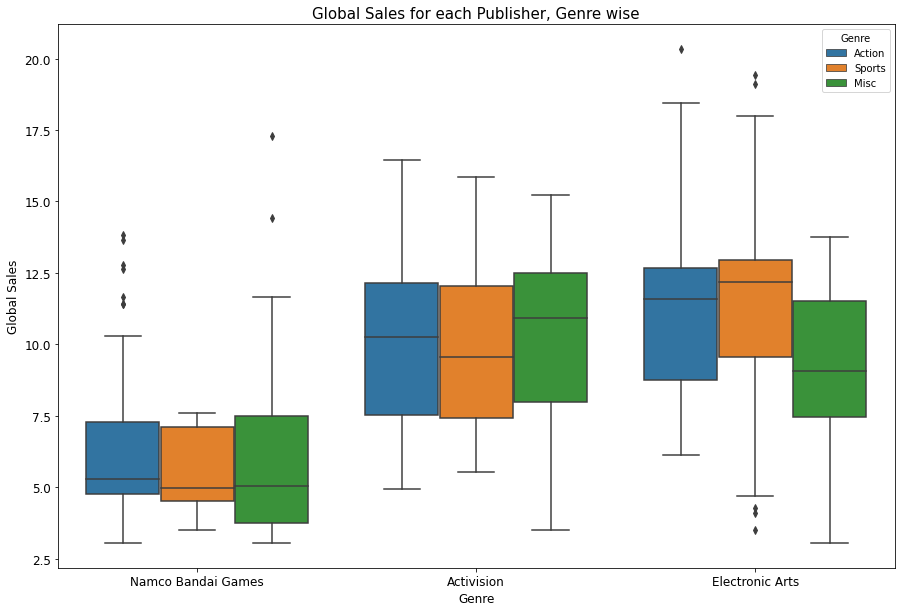

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Publisher',y='Global_Sales',hue='Genre',data=top3_data)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Global Sales for each Publisher, Genre wise', fontsize=15)
plt.show()

Inferences:

- Namco has lower median sales in every Genre as compared to all publishers

- Looking at `Action` Genre, even though EA and Activision has almost similar medians, Action is more spread in EA

- An interesting thing to notice here is that, for each of the three publishers, three different genre of games have higher sales median:
  - Namco: Action
  - Activision: Misc
  - EA: Sports


### NNN

So far we have seen how NA and EU are correlated with each other.

But how can we compare the data when we have 3 numerical variables?

#### Say, the question is, how does rank affect the correlation between NA and EU Sales?

We have used scatter plot for two numerical features, we have two options here
- Make a 3D Scatterplot 
  - → nice for 3D viz, but tough to report/show in static setting
- Add info about 3rd feature on the 2D scatter plot itself  
  - → Bubble Chart


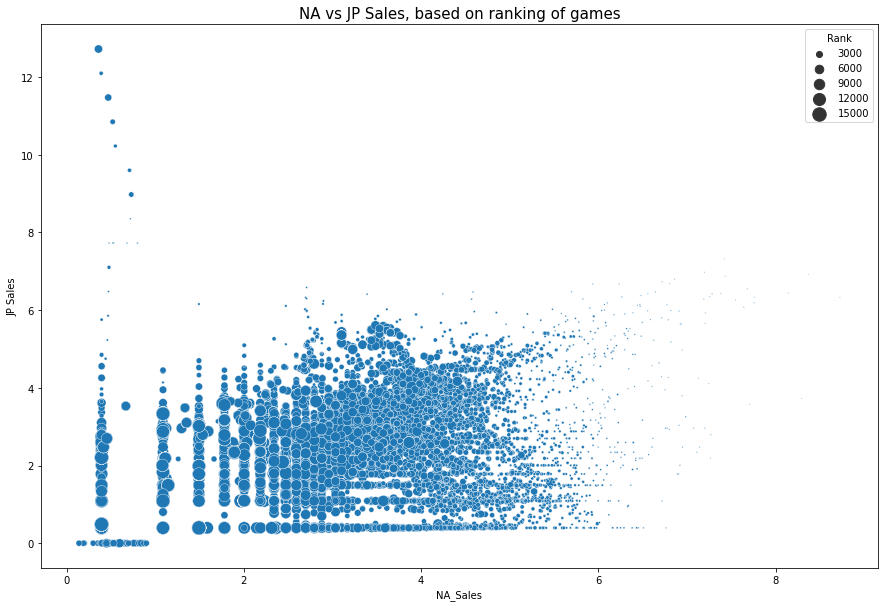

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data['NA_Sales'], y=data['JP_Sales'],data=top3_data, size=data['Rank'], sizes=(1, 200))
plt.xlabel('NA_Sales',fontsize=10)
plt.ylabel('JP Sales', fontsize=10)
plt.title('NA vs JP Sales, based on ranking of games', fontsize=15)
plt.show()

Inferences:
- Now interestingly, we can notice that higher ranking games are actually on the upper scale of sales, while lower ranking games are low on the sales side

## Subplots

So far we have **shown only 1 plot** using `plt.show()`

Say, we want to plot the trend of NA and every other region separately in a 
single figure

#### How can we plot multiple smaller plots at the same time?

We will use **subplots**, i.e., **divide the figure into smaller plots**


We will be using `plt.subplots()`
It takes mainly 2 arguments:

1. **No. of rows** we want to **divide our figure** into

2. **No. of columns** we want to **divide our figure** into

It returns 2 things:
- Figure
- Numpy Matrix of subplots


Text(0.5, 0.98, 'NA Sales vs Regions')

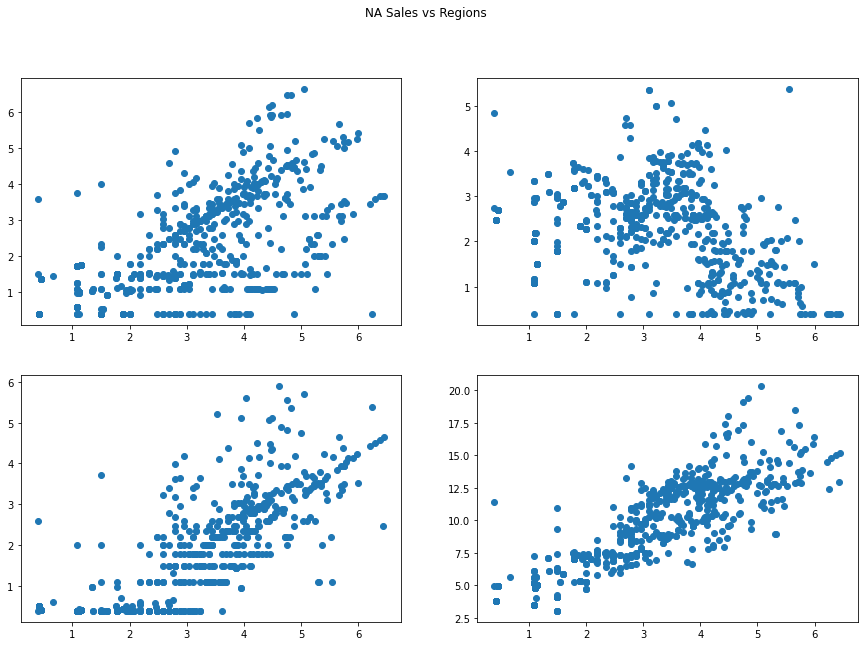

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0,0].scatter(top3_data['NA_Sales'], top3_data['EU_Sales'])
ax[0,1].scatter(top3_data['NA_Sales'], top3_data['JP_Sales'])
ax[1,0].scatter(top3_data['NA_Sales'], top3_data['Other_Sales'])
ax[1,1].scatter(top3_data['NA_Sales'], top3_data['Global_Sales'])

fig.suptitle('NA Sales vs Regions')

`Suptitle` adds a title to the whole figure

Notice, we are using 2 numbers during each plotting

Think of subplots as a 2x2 grids, with the two numbers denoting `x,y`/`row,column` coordinate of each subplot

#### What is this `ax` parameter exactly?

In [ ]:
print(ax)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda903bcd00>


Notice, 

- It's a 2x2 matrix of multiple axes objects

We are plotting each plot on a single `axes` object. 

Hence, we are using a 2D notation to access each grid/axes object of the subplot

Instead of accesing the individual axes using `ax[0, 0]`, `ax[1, 0]`, there is another method we can use too


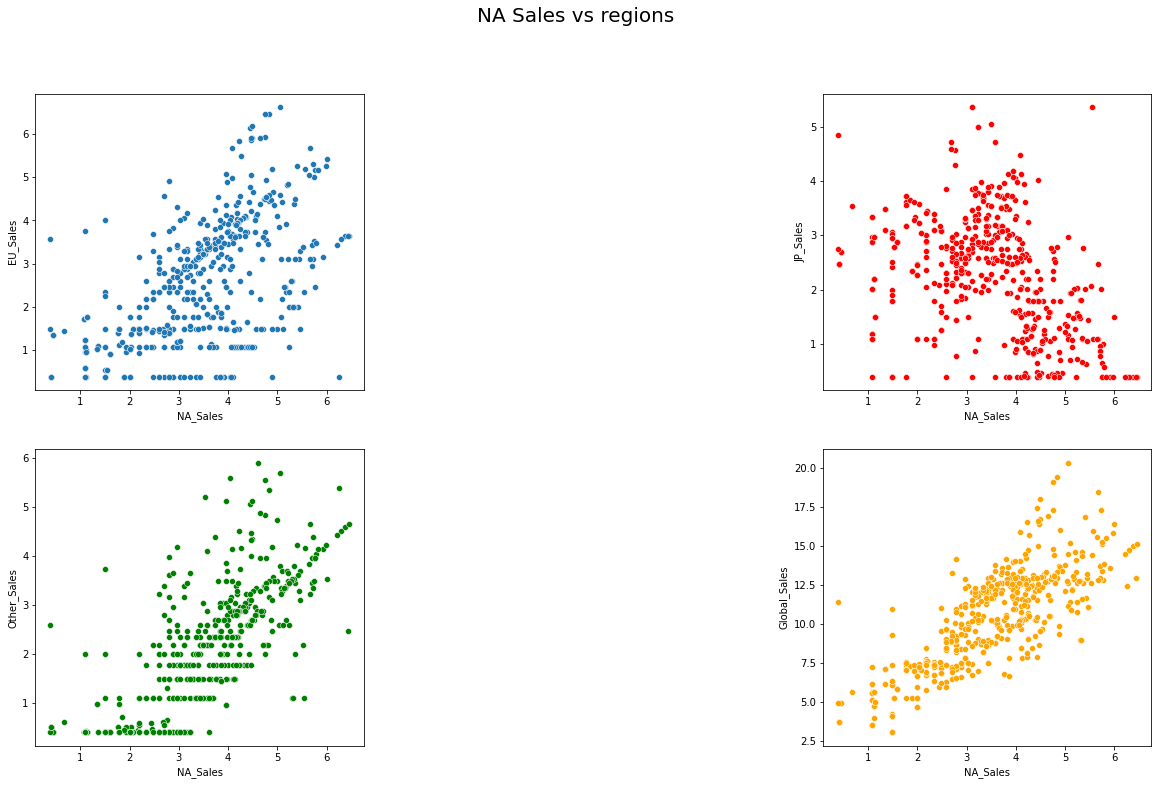

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,12))
# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)


plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')


plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')

fig.suptitle("NA Sales vs regions",fontsize=20)
plt.show()

#### We need to observe a few things here

  1. The 3rd paramter defines the position of the plot
  2. The position/numbering starts from 1
  3. It goes on row-wise from start of row to its finish
  4. Empty subplots don't show any axes 

#### But how do we know which plot belongs to which category?

Basically the context of each plot

We can use `title`, `x/y label` and every other functionality for the subplots too



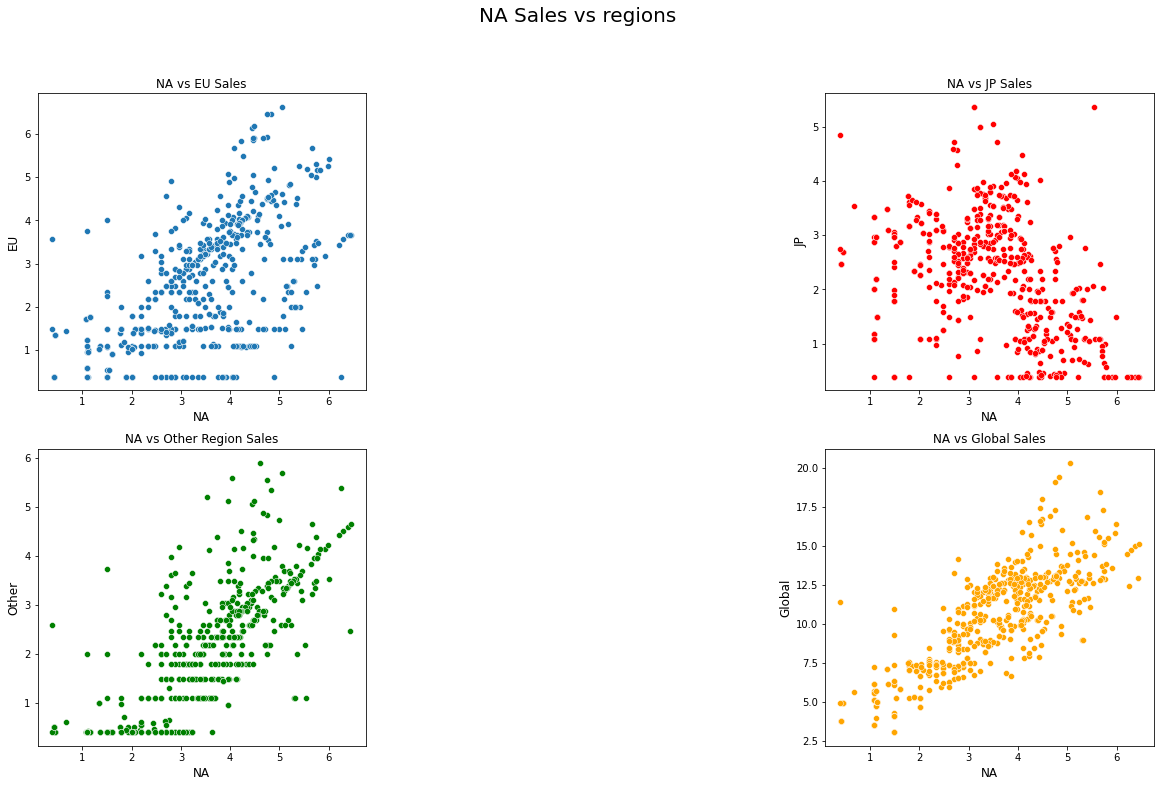

In [ ]:
fig = plt.figure(figsize=(20,12))

# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)



plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)


plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

fig.suptitle("NA Sales vs regions",fontsize=20)
plt.show()

#### What if we want to span a plot across the full length of the plot?

Think of this in **terms of a grid.**

Currently we are **dividing our plot into 2 rows and 3 columns**

But we want our plot to be across the middle column, with grids 2 and 5

This can be said as a **single column**

So, this problem can be simplified to plotting the plot across **second column in a 1 row 3 column subplot**

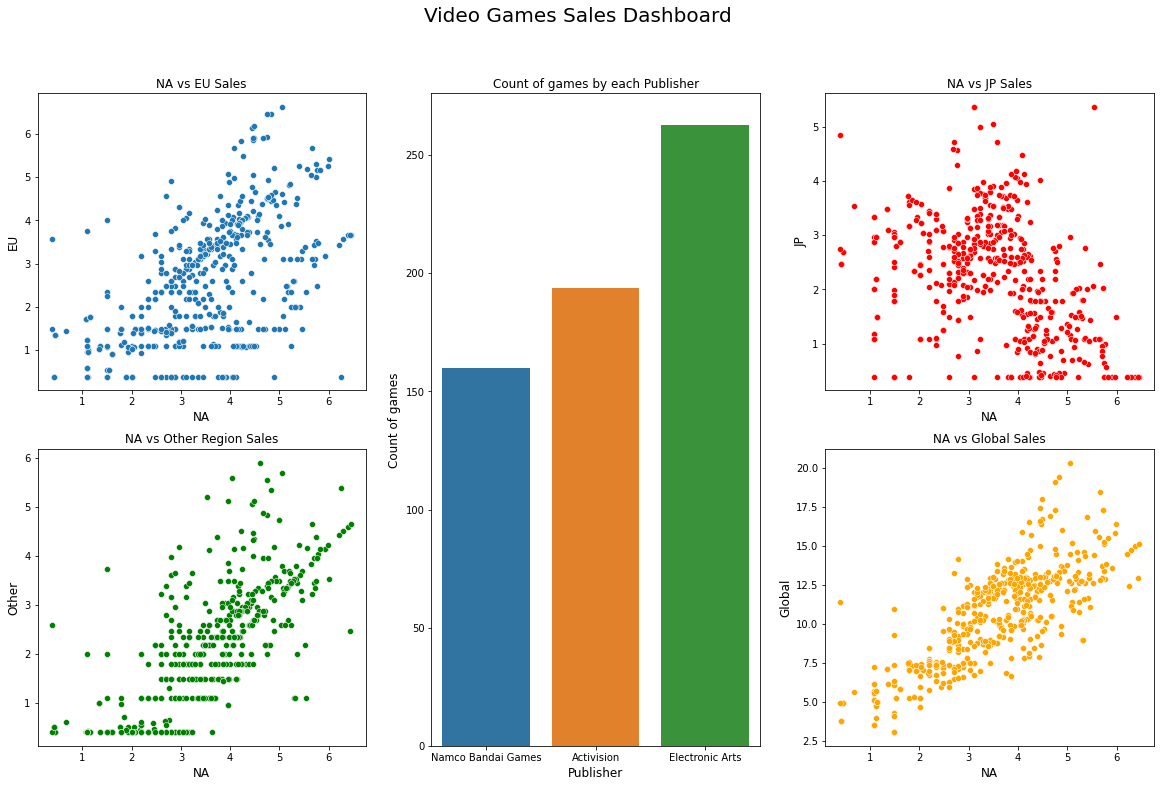

In [ ]:
fig = plt.figure(figsize=(20,12))

# Using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)



plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

# Countplot of publishers
plt.subplot(1,3,2)
sns.countplot(x='Publisher', data=top3_data)
plt.title('Count of games by each Publisher', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count of games', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

fig.suptitle("Video Games Sales Dashboard",fontsize=20)
plt.show()

## Joint Plot


#### Let's see a few more plots that we can visualize using `seaborn`

#### Joint Plot

- It draws a plot of two variables 


- It shows scatter, histogram and KDE graphs in the same plot.


#### Let's check it out

- We will take **`NA_Sales` as x-coordinates** and **`EU_Sales` as y-coordinates**


- We can select from different values for **parameter `kind`** and it **will plot accordingly**
    - "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"


- We will set **parameter `kind`** to **`'reg'`** here

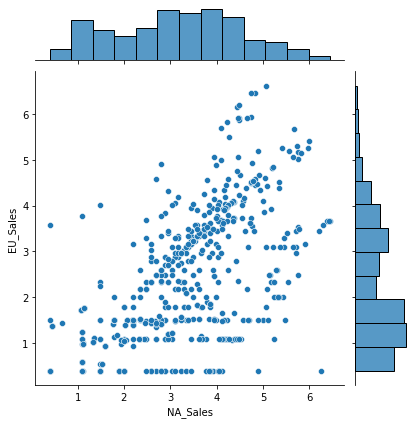

In [ ]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.show()

#### As we can see here:

- `jointplot` plots **scatter, histogram and KDE in the same graph** when we set **`kind=reg`**


- Scatter shows the **scattering of (`NA_Sales`, `EU_Sales`) pairs as (x, y) points**


- Histogram and KDE shows the separate distributions of `NA_Sales` and `EU_Sales` in the data


#### We can also add hue to Joint Plot

- Let's check how the 3 Genres of games are distributed in terms of `NA_Sales` and 'EU_Sales`



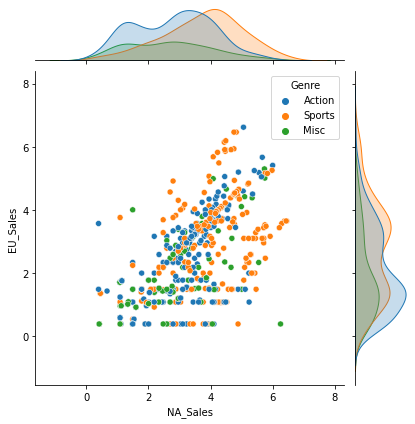

In [ ]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=top3_data, hue='Genre')
plt.show()

## Finding correlations among attributes

- We can find the level of correlation b/w different attributes (variables)

#### But what exactly is a correlation?

- Two variables are correlated when **they change in same/opposite direction**


#### We can check coefficient of correlation using `corr()`

In [ ]:
top3_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


- Higher the **MAGNITUDE** of coefficient of correlation, more the variables are **correlated**

- The **sign just determines the direction of change**
    - `+` means increase in value of one variable causes increase in value of other variable
    - `-` means increase in value of one variable causes decrease in value of other variable, and vice versa


#### As you can see, `Global Sales` and `Rank` have the highest correlation coeff of -0.91

#### Let's plot it using scatter plot

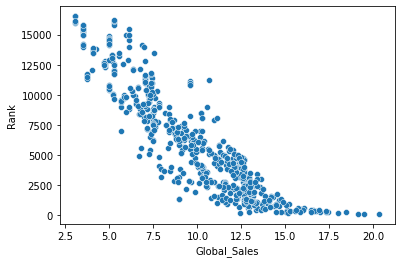

In [ ]:
sns.scatterplot(x= 'Global_Sales', y= 'Rank', data = top3_data)
plt.show()

- When `petal_length` increases, `petal_width` also increases

#### But Remember

**Correlation does NOT mean Causation**

- We cannot conclude that change in values of a variable is causing change in values of other variable

#### Now, Let's look at a way to visualize correlation among variables

### Heat Map

- A heat map plots rectangular data as a color-encoded matrix.

- **Stronger the colour, stronger the correlation b/w the variables**

#### Let's plot a Heat Map using correlation coefficient matrix generated using `corr()`

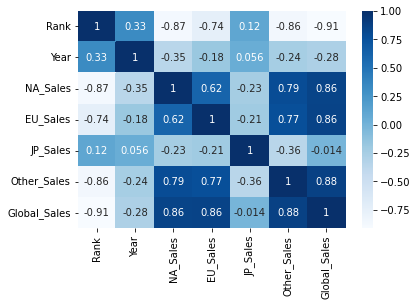

In [ ]:
sns.heatmap(top3_data.corr(), cmap= "Blues", annot=True)
plt.show()


- **`annot=True`** is for writing correlation coeff inside each cell

#### You can change the colours of cells in Heat Map if you like

- There are a lot of options available!

In [ ]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

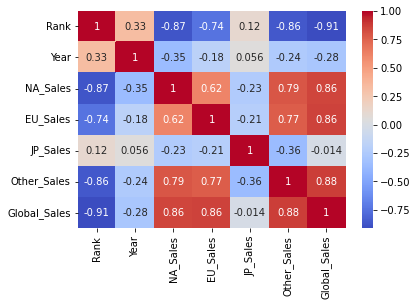

In [ ]:
sns.heatmap(top3_data.corr(), cmap= "coolwarm", annot=True)
plt.show()